In [1]:
# importing modules that are used in this project

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
# loading MNIST dataset
# Note -: input data has shape (28,28) so reshaping into 784 features

data=tf.keras.datasets.mnist.load_data(path='mnist.npz')
x_train=(data[0][0]).reshape((60000,784))
y_train=data[0][1]
x_test=(data[1][0]).reshape((10000,784))
y_test=data[1][1]


In [3]:
y_test.shape

(10000,)

<function matplotlib.pyplot.show(*args, **kw)>

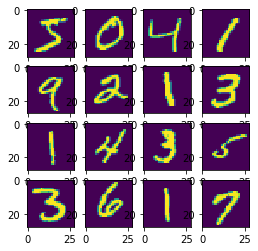

In [4]:
# Plotting 16 images of training data

ax=plt.figure(figsize=(4,4))

for i in range(16):
    
    k=ax.add_subplot(4,4,i+1)
    plt.imshow(x_train[i].reshape((28,28)))
plt.show

In [5]:
# converting output data into hot encoded 
# like there are 2 target classes in output -:
# so they will be represented like [1 ,0] , [0 1]

y_train_hot_encoded=np.zeros((y_train.shape[0],10),dtype=int)
y_test_hot_encoded=np.zeros((y_test.shape[0],10),dtype=int)

for i in range(len(y_train)):
    y_train_hot_encoded[i][y_train[i]]=1
    
for i in range(len(y_test)):
    y_test_hot_encoded[i][y_test[i]]=1
    
print(y_train.shape,y_train_hot_encoded.shape,y_test.shape,y_test_hot_encoded.shape)
y_train_hot_encoded[:5]

(60000,) (60000, 10) (10000,) (10000, 10)


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [6]:
# creating matrix for layers 
# there are 2 hidden layer and 1 output layer

n_input = 784
n_hidden_1 = 300
n_hidden_2 = 200
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
# forward propagation code -: gives output on input data

def forward_propagation(x, weights, biases):
    
    in_layer1=tf.add(tf.matmul(x,weights["h1"]),biases["h1"])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights["h2"]),biases["h2"])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights["out"]),biases["out"])
    
    return output

In [8]:
# optimizing cost -: reducing error 
# you can chage learing_rate (0.01) , and no of iterations (25)

x=tf.placeholder("float",shape=[None , 784])
y=tf.placeholder(tf.int32,shape=[None , 10])
    
output=forward_propagation(x, weights, biases)
    
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=output))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
    
for i in range(25):
    c, _=sess.run([cost,optimizer],feed_dict={x:x_train,y:y_train_hot_encoded})
    print("Cost in Iteration",i+1,"=",c)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost in Iteration 1 = 332845.62
Cost in Iteration 2 = 230727.39
Cost in Iteration 3 = 155106.02
Cost in Iteration 4 = 112199.44
Cost in Iteration 5 = 89943.234
Cost in Iteration 6 = 66621.44
Cost in Iteration 7 = 51966.883
Cost in Iteration 8 = 44510.61
Cost in Iteration 9 = 40482.785
Cost in Iteration 10 = 36951.15
Cost in Iteration 11 = 33129.92
Cost in Iteration 12 = 29763.35
Cost in Iteration 13 = 27317.38
Cost in Iteration 14 = 25620.447
Cost in Iteration 15 = 24256.213
Cost in Iteration 16 = 22965.588
Cost in Iteration 17 = 21624.855
Cost in Iteration 18 = 20290.035
Cost in Iteration 19 = 19137.834
Cost in Iteration 20 = 18319.408
Cost in Iteration 21 = 17734.203
Cost in Iteration 22 = 17212.451
Cost in Iteration 23 = 16617.656
Cost in Iteration 24 = 15907.746
Cost in Iteration 25 = 15125.482

In [16]:
# predicting output for test input
# and printing classification report 

X_test=tf.placeholder("float",shape=[None , 784])

test_predictions=tf.argmax(forward_propagation(X_test, weights, biases),1)

predictions=sess.run(test_predictions,feed_dict={X_test:x_test})    

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       980
           1       0.98      0.94      0.96      1135
           2       0.84      0.88      0.86      1032
           3       0.83      0.88      0.85      1010
           4       0.87      0.87      0.87       982
           5       0.83      0.80      0.82       892
           6       0.90      0.93      0.91       958
           7       0.91      0.88      0.89      1028
           8       0.83      0.78      0.80       974
           9       0.81      0.84      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

